In [3]:
class Solow:
    'implements the solow growth model'
    
    def __init__(self, 
                 n=0.05, # population growth rate
                 s=0.25, # savings rate
                 d=0.1,  # depreciation rate
                 a=0.3,  # share of labor
                 z=2.0,  # productivity
                 k=1.0): # current capital stock
        
        self.n, self.s, self.d, self.a, self.z, self.k = n, s, d, a, z, k
    
    
    def h(self):
        n, s, d, a, z = self.n, self.s, self.d, self.a, self.z
        
        return ((s*z*self.k**a)+(1-d)*self.k)/(1+n)
    
    
    def update(self):
        self.k=self.h()
        
    
    def steady_state(self):
        n,s,d,a,z,k = self.n, self.s, self.d, self.a, self.z, self.k
        
        return ((s * z) / (n + d))**(1 / (1 - a))
    
    def generate_sequence(self, t):
        path=[]
        for i in range(t):
            path.append(self.k)
            self.update()
            
        return path

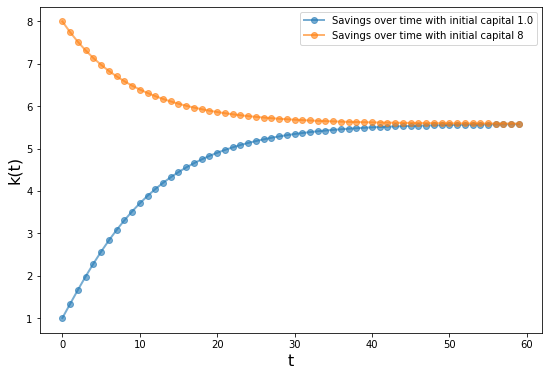

In [33]:
import matplotlib.pyplot as plt

s1 = Solow()
s2 = Solow(k=8)
T=60

fig, ax = plt.subplots(figsize=(9,6))

for s in s1, s2:
    lb=f'Savings over time with initial capital {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)
    
ax.set_xlabel('t', fontsize=16)
ax.set_ylabel('k(t)', fontsize=16)
ax.legend()